In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

In [11]:
# Read the dataset
df = pd.read_csv('tokopedia_score_content_cleaned.csv')

In [12]:
# Replace NaN in content with empty string
df['content'] = df['content'].fillna('')

In [13]:
# Create binary labels (0 for negative, 1 for positive)
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 3 else 0)

In [14]:
# Prepare the data
X = df['content'].values
y = df['sentiment'].values

print(f"Total samples: {len(X)}")
print(f"Positive samples: {sum(y == 1)}")
print(f"Negative samples: {sum(y == 0)}\n")

Total samples: 5000
Positive samples: 2876
Negative samples: 2124



In [15]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

In [16]:
# Initialize K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)


Fold 1
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.80      0.85      0.82       424
     Positif       0.88      0.84      0.86       576

    accuracy                           0.85      1000
   macro avg       0.84      0.85      0.84      1000
weighted avg       0.85      0.85      0.85      1000



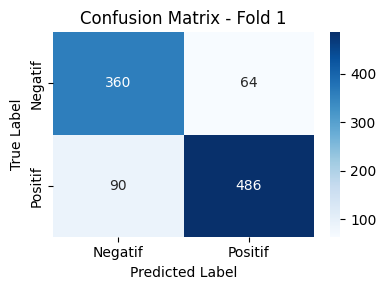


Fold 2
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.79      0.89      0.84       409
     Positif       0.92      0.84      0.88       591

    accuracy                           0.86      1000
   macro avg       0.85      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



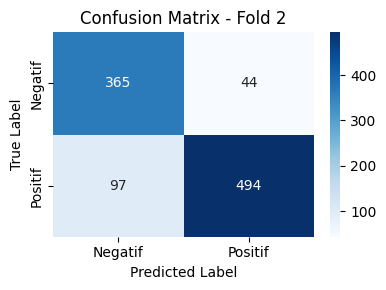


Fold 3
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.79      0.85      0.82       429
     Positif       0.88      0.83      0.85       571

    accuracy                           0.84      1000
   macro avg       0.83      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



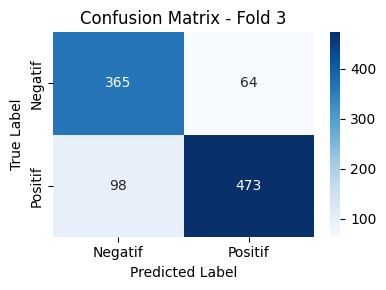


Fold 4
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.82      0.87      0.84       449
     Positif       0.89      0.85      0.87       551

    accuracy                           0.86      1000
   macro avg       0.85      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



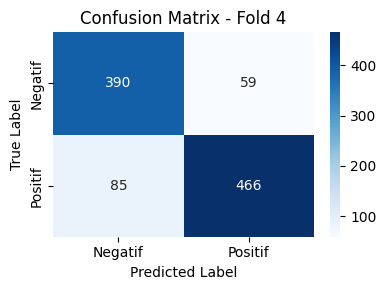


Fold 5
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.79      0.88      0.84       413
     Positif       0.91      0.84      0.87       587

    accuracy                           0.86      1000
   macro avg       0.85      0.86      0.85      1000
weighted avg       0.86      0.86      0.86      1000



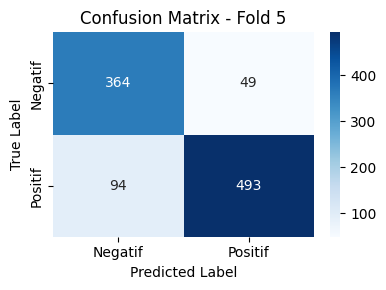

In [17]:
# Lists to store results
fold_metrics = []

# Perform K-Fold Cross Validation
for fold, (train_idx, val_idx) in enumerate(k_fold.split(X), 1):
    print(f"\n{'='*50}")
    print(f"Fold {fold}")
    print('='*50)
    
    # Split the data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # TF-IDF transformation
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_val_tfidf = tfidf.transform(X_val)
    
    # Initialize and train SVM
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_tfidf, y_train)
    
    # Make predictions
    predictions = svm.predict(X_val_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    f1 = f1_score(y_val, predictions)
    conf_matrix = confusion_matrix(y_val, predictions)
    
    # Store metrics
    fold_metrics.append({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_val, predictions, target_names=['Negatif', 'Positif']))

    # Visualize confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negatif', 'Positif'],
                yticklabels=['Negatif', 'Positif'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Cetak akurasi tiap fold secara terformat
print("\nAkurasi tiap Fold:")
for i, m in enumerate(fold_metrics, 1):
    print(f"Fold {i}: {m['accuracy']:.2f}")

# Cetak rata-rata akurasi
mean_acc = np.mean([m['accuracy'] for m in fold_metrics])
print(f"\nRata-rata akurasi K-Fold: {mean_acc:.2f}")


Akurasi tiap Fold:
Fold 1: 0.85
Fold 2: 0.86
Fold 3: 0.84
Fold 4: 0.86
Fold 5: 0.86

Rata-rata akurasi K-Fold: 0.85
